# Opening the CSV File

In [871]:
#Opening Packages for Future Analysis (some not used)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
import plotly.express as px

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp


In [872]:
#importing libraries for anova and t-tests


import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.stats.multicomp as mc

In [873]:
df = pd.read_csv("/Users/emilyclarke/Desktop/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [874]:
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


# Preprocessing the DataFrame, Organizing the Variables, Removing Missing Values, etc.

First, we want to clean the dataframe, from reading 'df.head()' above, there are a lot of 'NaN' values in search reason and items found for example. To ensure a clean dataset for ALL variables, we need to convert and define NaN as 0 (a number). This will help us in our analysis later as we cannot have missing variables.

In [875]:
#I want to look for missing values in the dataset, as I see that there are many NaN values in the search reason categories. This is the variable I want to study, so I want to ensure there are no missing values before I analyse it.
#I can see that there are 4 missing values in race, 24 in age, and 57475 missing values in search reason (injury, escape, weapons, and evidence)
#Previously tried df. replace(np. nan,0), but it did not recognize the changes as actually zero when looking at the isnull info.


df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [876]:
#From this, I can tell that I can use pandas.DataFrame.fillna to "Fill NA/NaN values using the specified method" (Found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
#cleaning all variables, to ensure there are no missing variables within the dataset. this will make our analysis later much easier...
#with this, we are assuming that every missing variable with "NaN" is equal to zero (0)

df = df.fillna(value = {
                'ArrestID': 0,
                'Occurrence_Category': 0,
                'Perceived_Race': 0,
                'Age_group__at_arrest_': 0,
                'SearchReason_CauseInjury': 0,
                'SearchReason_AssistEscape': 0,
                'SearchReason_PossessWeapons': 0,
                'SearchReason_PossessEvidence': 0,
                'ItemsFound': 0})
#checking df
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

In [877]:
#ok, now that that is cleaned, I want to drop all the missing values, for example U in female column or missing race categories.
#Remove any other missing values.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#this will help clean the dataset even more, such as U values in sex or missing race values!!

df = df.dropna()
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,65275


In [878]:
#checking info
#I think we are ready to move onto grouping for our research questions

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         65276 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65276 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65276 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

# Creating and Grouping Tables

# Research Question One (Strip Search, Sex, and Race)

In [879]:
#creating smaller dataframe for research question 1, labelled as df_1

df_1 = df.groupby(['Perceived_Race', 'Sex'])['StripSearch'].sum().reset_index()
df_1

,Perceived_Race,Sex,StripSearch
0,0,F,0
1,0,M,1
2,Black,F,255
3,Black,M,2179
4,East/Southeast Asian,F,25
5,East/Southeast Asian,M,316
6,Indigenous,F,74
7,Indigenous,M,232
8,Latino,F,10
9,Latino,M,122


In [880]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Perceived_Race  21 non-null     object
 1   Sex             21 non-null     object
 2   StripSearch     21 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 632.0+ bytes


In [881]:
#checking sex categorical variables considering we do not want U and want to remove it
print(df_1['Sex'].value_counts())

F    9
M    9
U    3
Name: Sex, dtype: int64


In [882]:
#there are three instances of the U variable, we want to REMOVE
df_1 = df_1[df_1['Sex']!='U']

In [883]:
#checking if it was properly removed
df_1['Sex'].value_counts()

F    9
M    9
Name: Sex, dtype: int64

In [884]:
#checking dataframe
df_1

,Perceived_Race,Sex,StripSearch
0,0,F,0
1,0,M,1
2,Black,F,255
3,Black,M,2179
4,East/Southeast Asian,F,25
5,East/Southeast Asian,M,316
6,Indigenous,F,74
7,Indigenous,M,232
8,Latino,F,10
9,Latino,M,122


In [885]:
#we see that the two first rows of race have 0 as a value, we want to remove those. will repeat the .value_counts() steps
print(df_1['Perceived_Race'].value_counts())

0                       2
Black                   2
East/Southeast Asian    2
Indigenous              2
Latino                  2
Middle-Eastern          2
South Asian             2
Unknown or Legacy       2
White                   2
Name: Perceived_Race, dtype: int64


In [886]:
#remove 0
df_1 = df_1[df_1['Perceived_Race'] != '0']


In [887]:
#checking df... weird - still there as 0
print(df_1['Perceived_Race'].unique())


[0 'Black' 'East/Southeast Asian' 'Indigenous' 'Latino' 'Middle-Eastern'
 'South Asian' 'Unknown or Legacy' 'White']


In [888]:
#Even after removing 0 from race, it makes me believe it is not a string of 0, but an actual numerical value. 
#using dropna to remove

df_1 = df_1.dropna(subset=['Perceived_Race'])

In [889]:
#weird, still there as zero!
print(df_1['Perceived_Race'].value_counts())


0                       2
Black                   2
East/Southeast Asian    2
Indigenous              2
Latino                  2
Middle-Eastern          2
South Asian             2
Unknown or Legacy       2
White                   2
Name: Perceived_Race, dtype: int64


After trying many methods to remove the zero, I will finally just create a list of expected values and filter out any rows where the 'Perceived_Race' column is not in that list

In [890]:
expected_values = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
df_1 = df_1[df_1['Perceived_Race'].isin(expected_values)]

In [891]:
print(df_1['Perceived_Race'].value_counts())


Black                   2
East/Southeast Asian    2
Indigenous              2
Latino                  2
Middle-Eastern          2
South Asian             2
Unknown or Legacy       2
White                   2
Name: Perceived_Race, dtype: int64


In [892]:
df_1.describe()

,StripSearch
count,16.00000
mean,487.50000
std,810.94299
min,10.00000
25%,62.25000
50%,220.00000
75%,347.00000
max,2788.00000


In [893]:
print(df.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [894]:
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

In [895]:
#resetting index
df_1.reset_index(drop=True, inplace=True)

In [896]:
df_1

,Perceived_Race,Sex,StripSearch
0,Black,F,255
1,Black,M,2179
2,East/Southeast Asian,F,25
3,East/Southeast Asian,M,316
4,Indigenous,F,74
5,Indigenous,M,232
6,Latino,F,10
7,Latino,M,122
8,Middle-Eastern,F,18
9,Middle-Eastern,M,210


Creating Group for Two-Way ANOVA, since the groupby() group is not working for analysis...

In [840]:
ss = df[['Perceived_Race', 'Sex', 'StripSearch']]
ss

,Perceived_Race,Sex,StripSearch
0,White,M,0
1,White,M,0
2,Unknown or Legacy,M,0
3,Black,M,0
4,South Asian,M,0
...,...,...,...
65271,Indigenous,F,0
65272,South Asian,M,0
65273,White,F,0
65274,Unknown or Legacy,M,0


In [841]:
#checking sex
print(ss['Sex'].value_counts())

M    52650
F    12617
U        9
Name: Sex, dtype: int64


In [842]:
#removing U
ss = ss[ss['Sex']!='U']

In [843]:
#checking if removed
print(ss['Sex'].value_counts())

M    52650
F    12617
Name: Sex, dtype: int64


In [844]:
#checking race
print(ss['Perceived_Race'].value_counts())

White                   27718
Black                   17526
Unknown or Legacy        5053
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
0                           4
Name: Perceived_Race, dtype: int64


In [845]:
#Removing 0 value
expected_values = ['Black', 'East/Southeast Asian', 'Indigenous', 'Latino', 'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White']
ss = ss[ss['Perceived_Race'].isin(expected_values)]

In [846]:
#checking race again
print(ss['Perceived_Race'].value_counts())

White                   27718
Black                   17526
Unknown or Legacy        5053
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64


# Research Question Two (Actions at Arrest, Age, and Sex)

In [781]:
df_2 = df[['Age_group__at_arrest_', 'Sex', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']]
df_2.head()

,Age_group__at_arrest_,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,Aged 35 to 44 years,M,0,0,0,0,0,1
1,Aged 35 to 44 years,M,0,0,0,0,0,0
2,Aged 35 to 44 years,M,0,0,0,0,0,0
3,Aged 25 to 34 years,M,0,0,0,0,0,0
4,Aged 25 to 34 years,M,0,0,0,0,0,0


In [782]:
df_2['Age_group__at_arrest_'].unique()
#rename 17 and 65 age groups

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 and older',
       'Aged 65 years and older', 0, 'Aged 17 years and younger',
       'Aged 17 years and under'], dtype=object)

In [783]:
#rename 'aged 17 years and under' to 'aged 17 years and younger'
df_2['Age_group__at_arrest_'] = df_2['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger')

#rename 'age 65 and older' to 'aged 65 years and older'

df_2['Age_group__at_arrest_'] = df_2['Age_group__at_arrest_'].replace('Aged 65 and older', 'Aged 65 years and older')

#open df_2

df_2['Age_group__at_arrest_'].unique()

/var/folders/9x/pyc_plbs3vzfjk7sd5yq6f2c0000gn/T/ipykernel_92377/3510723928.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9x/pyc_plbs3vzfjk7sd5yq6f2c0000gn/T/ipykernel_92377/3510723928.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 years and older', 0,
       'Aged 17 years and younger'], dtype=object)

In [784]:
df_2.head()

,Age_group__at_arrest_,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,Aged 35 to 44 years,M,0,0,0,0,0,1
1,Aged 35 to 44 years,M,0,0,0,0,0,0
2,Aged 35 to 44 years,M,0,0,0,0,0,0
3,Aged 25 to 34 years,M,0,0,0,0,0,0
4,Aged 25 to 34 years,M,0,0,0,0,0,0


In [785]:
df_2['Number_of_Actions'] = df_2[['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']].sum(axis = 1)
df_2

/var/folders/9x/pyc_plbs3vzfjk7sd5yq6f2c0000gn/T/ipykernel_92377/1022244392.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age_group__at_arrest_,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Number_of_Actions
0,Aged 35 to 44 years,M,0,0,0,0,0,1,1
1,Aged 35 to 44 years,M,0,0,0,0,0,0,0
2,Aged 35 to 44 years,M,0,0,0,0,0,0,0
3,Aged 25 to 34 years,M,0,0,0,0,0,0,0
4,Aged 25 to 34 years,M,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
65271,Aged 25 to 34 years,F,0,0,1,0,0,0,1
65272,Aged 35 to 44 years,M,0,0,0,0,0,0,0
65273,Aged 45 to 54 years,F,0,0,0,0,0,0,0
65274,Aged 17 years and younger,M,0,0,0,0,0,1,1


In [786]:
df_2 = df_2[['Age_group__at_arrest_', 'Sex', 'Number_of_Actions']]
df_2

,Age_group__at_arrest_,Sex,Number_of_Actions
0,Aged 35 to 44 years,M,1
1,Aged 35 to 44 years,M,0
2,Aged 35 to 44 years,M,0
3,Aged 25 to 34 years,M,0
4,Aged 25 to 34 years,M,0
...,...,...,...
65271,Aged 25 to 34 years,F,1
65272,Aged 35 to 44 years,M,0
65273,Aged 45 to 54 years,F,0
65274,Aged 17 years and younger,M,1


In [787]:
action_count_1 = df_2.groupby(['Sex', 'Age_group__at_arrest_']) ['Number_of_Actions'].size().reset_index() #column 0 represents the actions for that specific group
action_count_1

,Sex,Age_group__at_arrest_,Number_of_Actions
0,F,0,8
1,F,Aged 17 years and younger,733
2,F,Aged 18 to 24 years,2069
3,F,Aged 25 to 34 years,4231
4,F,Aged 35 to 44 years,3084
5,F,Aged 45 to 54 years,1602
6,F,Aged 55 to 64 years,680
7,F,Aged 65 years and older,210
8,M,0,16
9,M,Aged 17 years and younger,2309


In [788]:
#checking the sex column for df2
print(action_count_1['Sex'].value_counts())

F    8
M    8
U    4
Name: Sex, dtype: int64


In [789]:
#there are 4 instances of the U column, we do not want that.. will be dropping this like we did in RQ1
action_count_1 = action_count_1[action_count_1['Sex']!='U']

In [790]:
#checking column, perfect.
action_count_1['Sex'].value_counts()

F    8
M    8
Name: Sex, dtype: int64

In [791]:
#dropping age rows with 0
action_count_1 = action_count_1.drop([0, 8])


In [792]:
#resetting the index for our graphs later
action_count_1.reset_index(drop=True)

,Sex,Age_group__at_arrest_,Number_of_Actions
0,F,Aged 17 years and younger,733
1,F,Aged 18 to 24 years,2069
2,F,Aged 25 to 34 years,4231
3,F,Aged 35 to 44 years,3084
4,F,Aged 45 to 54 years,1602
5,F,Aged 55 to 64 years,680
6,F,Aged 65 years and older,210
7,M,Aged 17 years and younger,2309
8,M,Aged 18 to 24 years,7970
9,M,Aged 25 to 34 years,16714


In [793]:
#generating descriptive statistics

action_count_1.describe()

,Number_of_Actions
count,14.000000
mean,4660.214286
std,4998.416213
min,210.000000
25%,1234.500000
50%,2696.500000
75%,6655.750000
max,16714.000000


# Graph Time!

# Graphs - Research Question 1

# Boxplot

In [897]:
#boxplot for rq1 between strip search and sex

bp1 = px.box(df_1
            , x = 'StripSearch'
            , y = 'Sex'
            , title = "BoxPlot of Number of Strip Searches Compared with Sex"
            )
bp1.show()

In [795]:
#boxplot for rq1 between strip search and perceived race

bp2 = px.box(df_1
            , x = 'StripSearch'
            , y = 'Perceived_Race'
            , title = "BoxPlot of Number of Strip Searches Compared with Race"
            )
bp2.show()

# Bar Chart

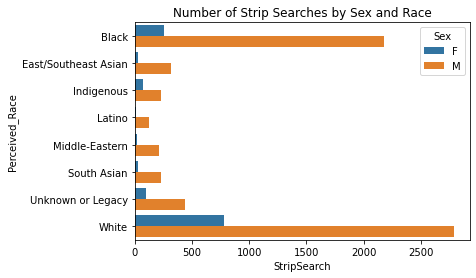

In [796]:
#using seaborn barplot to complete EDA on number of strip searches by perceived race


sns.barplot(data=df_1, x="StripSearch", y="Perceived_Race", hue="Sex").set(title='Number of Strip Searches by Sex and Race')
plt.show()

# Histogram

In [797]:
px.histogram(data_frame = df_1
            , x = 'StripSearch'
            , y = 'Perceived_Race'
            , facet_col = 'Sex'
            , title = "Histogram of Number of Strip Searches Compared with Sex and Race"
            )

# Graphs - Research Question 2

# Bar Chart

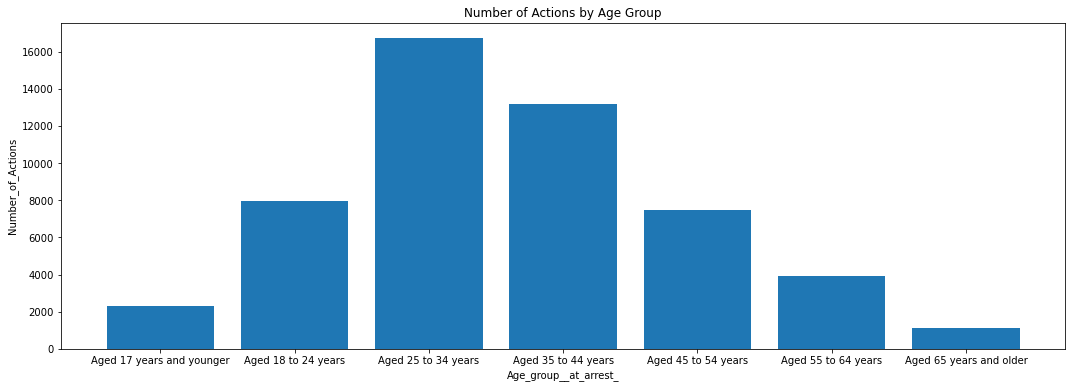

In [798]:
# create a bigger plot
fig, ax = plt.subplots(figsize=(18, 6))

# create a bar chart of the data
ax.bar(action_count_1['Age_group__at_arrest_'], action_count_1['Number_of_Actions'])
ax.set_xlabel('Age_group__at_arrest_')
ax.set_ylabel('Number_of_Actions')
ax.set_title('Number of Actions by Age Group')
plt.show()

# Histogram

In [799]:
px.histogram(data_frame = action_count_1
            , x = 'Number_of_Actions'
            , y = 'Age_group__at_arrest_'
            , facet_col = 'Sex'
            , title = "Histogram of Number of Actions at Arrest Compared with Sex and Age"
            )

# BoxPlot

In [800]:
#boxplot for rq2 between strip search and sex

bp3 = px.box(action_count_1
            , x = 'Number_of_Actions'
            , y = 'Sex'
            , title = "BoxPlot of Number of Actions at Arrest Compared with Sex"
            )
bp3.show()

In [801]:
#boxplot for rq2 between strip search and sex

bp4 = px.box(action_count_1
            , x = 'Number_of_Actions'
            , y = 'Age_group__at_arrest_'
            , title = "BoxPlot of Number of Actions at Arrest Compared with Age"
            )
bp4.show()

In [831]:
action_count_1.describe()

,Number_of_Actions
count,14.000000
mean,4660.214286
std,4998.416213
min,210.000000
25%,1234.500000
50%,2696.500000
75%,6655.750000
max,16714.000000


# ANOVA Tests

# One Way ANOVA for RQ1 (Strip Search and Sex)

In [802]:
#understanding the variables
rp.summary_cont(df_1['StripSearch'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,StripSearch,16.0,487.5,810.943,202.7357,55.379,919.621


In [803]:
#understanding the variables

rp.summary_cont(df_1['StripSearch'].groupby(df_1['Sex']))


,N,Mean,SD,SE,95% Conf.,Interval
Sex,,,,,,
F,8,160.375,262.1390,92.6801,-58.7787,379.5287
M,8,814.625,1046.8482,370.1167,-60.5620,1689.8120


In [804]:
#creating a one-way anova for strip search and sex
model = ols('StripSearch ~ C(Sex)', data=df_1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Sex),1712172.25,1.0,2.940341,0.108433
Residual,8152255.75,14.0,NaN,NaN


*Not significant, Tukey Test not needed...

# Two Way ANOVA for RQ1 (Strip Search, Race, and Sex)

In [805]:
#libraries

import statsmodels.api as sm
from statsmodels.formula.api import ols

#performing the two-way anova for RQ1, using 'ss' dataframe

model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=ss).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),42.425430,7.0,58.046535,1.939933e-83
C(Sex),7.000364,1.0,67.045357,2.700757e-16
C(Perceived_Race):C(Sex),7.786977,7.0,10.654154,1.778725e-13
Residual,6812.593171,65247.0,NaN,NaN


# Interaction Plot

# Interaction Plot for RQ1

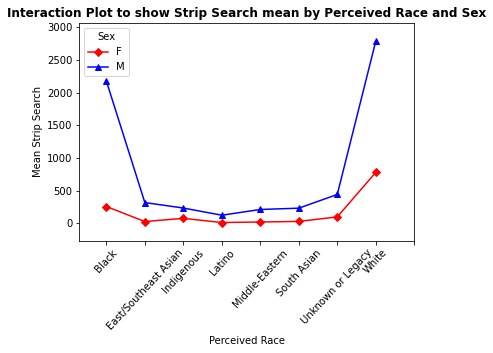

In [806]:
#libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

#creating interaction plot

fig = interaction_plot(df_1['Perceived_Race'], df_1['Sex'], df_1['StripSearch'],
             colors=['red','blue'], markers=['D','^'], 
             ylabel='StripSearch', xlabel='Perceived Race')
plt.xticks(np.arange(9), rotation=47)
plt.ylabel('Mean Strip Search')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show Strip Search mean by Perceived Race and Sex', fontweight='bold')
plt.show()

# Interaction Plot for RQ2

In [898]:
#forgot to reset index for action_count_1, resetting now
action_count_1.reset_index(drop=True, inplace=True)

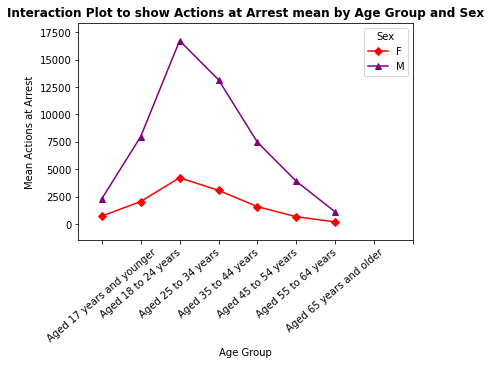

In [899]:
fig = interaction_plot(action_count_1['Age_group__at_arrest_'], action_count_1['Sex'], action_count_1['Number_of_Actions'],
             colors=['red','purple'], markers=['D','^'], 
             ylabel='Number of Actions at Arrest', xlabel='Age Group at Arrest')
plt.xticks(np.arange(9), rotation=40)
plt.ylabel('Mean Actions at Arrest')
plt.xlabel('Age Group')
plt.title('Interaction Plot to show Actions at Arrest mean by Age Group and Sex', fontweight='bold')
plt.show()

# One Way ANOVA for RQ2 (Actions and Sex)

In [809]:
#creating a one-way anova for ACTIONS and sex
model = ols('Number_of_Actions ~ C(Sex)', data=action_count_1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Sex),1.144286e+08,1.0,6.527416,0.025238
Residual,2.103655e+08,12.0,NaN,NaN


In [810]:
#p-value is significant
#this is a tukey test between sex and strip search for rq1, not allowing me to add perceived race as a third variable

tukeytestdf2 = mc.MultiComparison(action_count_1['Number_of_Actions'], action_count_1['Sex'])
result = tukeytestdf2.tukeyhsd()

print('Tukey HSD for Number of Actions at Arrest across Sex')
print(result)

Tukey HSD for Number of Actions at Arrest across Sex
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     F      M 5717.8571 0.0252 841.6453 10594.069   True
--------------------------------------------------------


# Two Way ANOVA for RQ2 (Actions, Age, and Sex)

In [811]:
#performing the two-way anova for RQ2

model = ols('Number_of_Actions ~ C(Age_group__at_arrest_) + C(Sex) + C(Age_group__at_arrest_):C(Sex)', data=df_2).fit()
sm.stats.anova_lm(model, typ=2)

/Users/emilyclarke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 7, but rank is 4

/Users/emilyclarke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/Users/emilyclarke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 14, but rank is 11



,sum_sq,df,F,PR(>F)
C(Age_group__at_arrest_),11.636744,7.0,4.857109,0.000648
C(Sex),-0.000233,2.0,-0.000340,1.000000
C(Age_group__at_arrest_):C(Sex),10.334874,14.0,2.156858,0.013954
Residual,22334.492607,65256.0,NaN,NaN


# T-Test

# T-Test for RQ1

In [812]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

def welch_dof(x, y): 
    '''
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [815]:
df_1['Sex'].unique
#currently in object (categorical) form

<bound method Series.unique of 0     F
1     M
2     F
3     M
4     F
5     M
6     F
7     M
8     F
9     M
10    F
11    M
12    F
13    M
14    F
15    M
Name: Sex, dtype: object>

In [818]:
##Conduct sex t-test, where m = male, f = female

#create sex groups from dataset 
F_fem = df_1[df_1['Sex']=='F']
M_mal = df_1[df_1['Sex']=='M']

F_S = F_fem['StripSearch']
M_S = M_mal['StripSearch']

#conduct ttest
print('Ttest results for strip search:',stats.ttest_ind(F_S, M_S, equal_var=False)) #p value is not significant

Ttest results for strip search: Ttest_indResult(statistic=-1.7147422430880237, pvalue=0.12533757126252384)


In [821]:
#calculate mean and standard deviation of groups 
#Males higher mean indicate higher average of strip searches 
print('Mean Strip Search by Females and Males:',F_S.mean(), M_S.mean())
print('Standard deviation Strip Search by Females and Males:',F_S.std(), M_S.std())

Mean Strip Search by Females and Males: 160.375 814.625
Standard deviation Strip Search by Females and Males: 262.1389694145346 1046.8481862237713


In [822]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(F_S), sms.DescrStatsW(M_S))
print('Confidence interval for Strip Search:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Strip Search: (-1536.5409608306613, 228.04096083066133)


In [823]:
#welch dof 
print('DOF for Strip Search:',welch_dof(F_S, M_S))

DOF for Strip Search: 7.87441900834675


# T-Test for RQ2

In [824]:
action_count_1

,Sex,Age_group__at_arrest_,Number_of_Actions
0,F,Aged 17 years and younger,733
1,F,Aged 18 to 24 years,2069
2,F,Aged 25 to 34 years,4231
3,F,Aged 35 to 44 years,3084
4,F,Aged 45 to 54 years,1602
5,F,Aged 55 to 64 years,680
6,F,Aged 65 years and older,210
7,M,Aged 17 years and younger,2309
8,M,Aged 18 to 24 years,7970
9,M,Aged 25 to 34 years,16714


In [825]:
##Conduct sex t-test, where m = male, f = female

#create sex groups from dataset 
F_ = action_count_1[action_count_1['Sex']=='F']
M_ = action_count_1[action_count_1['Sex']=='M']

F_A = F_ ['Number_of_Actions']
M_A = M_ ['Number_of_Actions']

#conduct ttest
print('Ttest results for Actions at Arrest:',stats.ttest_ind(F_A, M_A, equal_var=False)) #p value is significant

Ttest results for Actions at Arrest: Ttest_indResult(statistic=-2.554880915690823, pvalue=0.03895978707835791)


In [826]:
F_A

0     733
1    2069
2    4231
3    3084
4    1602
5     680
6     210
Name: Number_of_Actions, dtype: int64

In [828]:
#calculate mean and standard deviation of groups 
#Males higher mean indicate higher average of actions at arrest 
print('Mean Number of Actions at Arrest by Females and Males:',F_A.mean(), M_A.mean())
print('Standard deviation Actions by Females and Males:',F_A.std(), M_A.std())

Mean Number of Actions at Arrest by Females and Males: 1801.2857142857142 7519.142857142857
Standard deviation Actions by Females and Males: 1448.6176990825559 5741.291446720892


In [829]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(F_A), sms.DescrStatsW(M_A))
print('Confidence interval for Actions at Arrest:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Actions at Arrest: (-11048.098578073623, -387.61570764066437)


In [830]:
#welch dof 
print('DOF for Actions at Arrest:',welch_dof(F_A, M_A))

DOF for Actions at Arrest: 6.760874438245906
